In [1]:
from dlc_practical_prologue import generate_pair_sets

nSamples = 1000
data = generate_pair_sets(nSamples)
var_names = ["train_input", "train_target", "train_classes", "test_input", "test_target", "test_classes"]
train_input, train_target, train_classes, test_input, test_target, test_classes = data
stringWidth = 20
for i, el in enumerate(list(map(lambda x: (x.shape, x.dtype), data))):
    print('{:s}  {:s}  {:s}'.format(
        var_names[i].ljust(stringWidth),
        ' x '.join(list(map(lambda x: str(x), list(el[0])))).center(stringWidth), 
        'dtype'.ljust(stringWidth)))

train_input            1000 x 2 x 14 x 14   dtype               
train_target                  1000          dtype               
train_classes               1000 x 2        dtype               
test_input             1000 x 2 x 14 x 14   dtype               
test_target                   1000          dtype               
test_classes                1000 x 2        dtype               


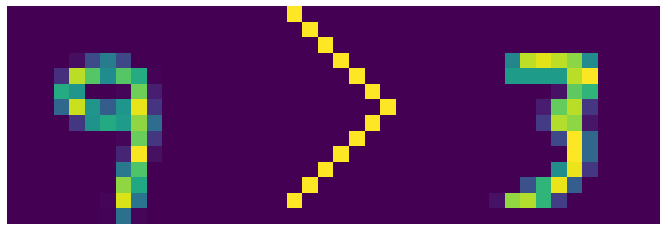

In [ ]:
from utils import show_pair

show_pair(train_input, train_target, 0)

## Without using the information from the classes

In [2]:
from utils import train_model
from models.net1 import Net1
import torch
import torch.nn as nn

model = Net1(50)
criterion = nn.BCEWithLogitsLoss()
eta = 1e-3
mini_batch_size = 100
optimizer = torch.optim.Adam(model.parameters(), lr = eta)
nb_epochs = 10


        
train_model(model, train_input, train_target.float(), test_input, test_target, nb_epochs, mini_batch_size, optimizer, criterion)

Epoch 0: loss 9.317 / train accuracy 74.5%, test accuracy 75.5
Epoch 1: loss 4.873 / train accuracy 78.9%, test accuracy 78.0
Epoch 2: loss 4.170 / train accuracy 82.6%, test accuracy 78.0
Epoch 3: loss 3.820 / train accuracy 84.7%, test accuracy 81.2
Epoch 4: loss 3.156 / train accuracy 87.1%, test accuracy 81.2
Epoch 5: loss 2.783 / train accuracy 89.8%, test accuracy 83.3
Epoch 6: loss 2.465 / train accuracy 90.2%, test accuracy 83.2
Epoch 7: loss 2.307 / train accuracy 90.8%, test accuracy 84.0
Epoch 8: loss 2.193 / train accuracy 93.5%, test accuracy 83.4
Epoch 9: loss 1.794 / train accuracy 92.9%, test accuracy 82.7


In [3]:
nParams = sum(p.numel() for p in model.parameters() if p.requires_grad)
print('The model has {:d} trainable parameters'.format(nParams))

The model has 29789 trainable parameters


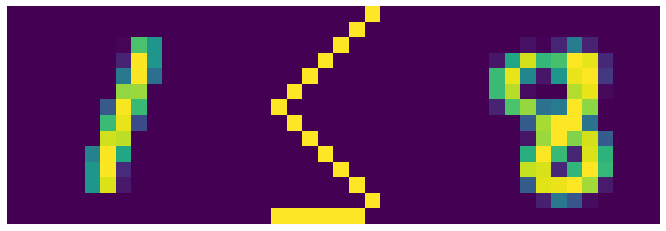

In [ ]:
predictions = model(test_input)
show_pair(test_input, predictions, 10)

## With class information during training

In [4]:
from utils import train_model_double_objective
from models.net2 import Net2

model = Net2(50)
criterion = nn.BCEWithLogitsLoss()
criterion2 = nn.CrossEntropyLoss()
eta = 1e-3
mini_batch_size = 10
optimizer = torch.optim.Adam(model.parameters(), lr = eta)
nb_epochs = 10


        
train_model_double_objective(model, train_input, train_target.float(), 
                             train_classes, test_input, test_target, 
                             test_classes, nb_epochs, mini_batch_size, optimizer, 
                             criterion, criterion2, beta = 1)

Epoch 0: loss 373.851 / train accuracy 75.6%, test accuracy 75.2
Epoch 1: loss 148.153 / train accuracy 82.3%, test accuracy 81.3
Epoch 2: loss 100.529 / train accuracy 82.5%, test accuracy 83.2
Epoch 3: loss 78.631 / train accuracy 86.5%, test accuracy 85.8
Epoch 4: loss 70.650 / train accuracy 89.9%, test accuracy 85.2
Epoch 5: loss 54.605 / train accuracy 90.4%, test accuracy 87.3
Epoch 6: loss 43.807 / train accuracy 91.6%, test accuracy 86.4
Epoch 7: loss 36.914 / train accuracy 92.6%, test accuracy 86.9
Epoch 8: loss 28.497 / train accuracy 94.2%, test accuracy 87.8
Epoch 9: loss 30.799 / train accuracy 92.8%, test accuracy 88.8


In [5]:
def accuracy_of_digit_class(model, input_, classes, mini_batch_size = 10):
  nb_errors = 0
  for b in range(0, input_.size(0), mini_batch_size): 
    _, out1, _ = model(input_.narrow(0, b, mini_batch_size))
    _, pred = torch.max(out1, dim=1)
    gt = classes.narrow(0, b, mini_batch_size)[:, 0]
    nb_errors += (pred != gt).sum().item()
  N = input_.shape[0]
  return 100*(N-nb_errors)/N

In [6]:
print("Accuracy: {:.2f}".format(accuracy_of_digit_class(model, test_input, test_classes)))

Accuracy: 92.90
